# PENTING DAN MOHON PERHATIAN

Pada Preprocessing kode ini menggunakan 2 STOPWORDS, yaitu Stopwords bahasa Indonesia dan Stopwords bahasa Inggris.

Langkah-langkah mengerjakan:
1. Run Preprocessing kode menggunakan stopwords Bahasa Indonesia terlebih dahulu, run sampai selesai

2. Run Preprocessing kode menggunakan stopwords Bahasa Inggris, dan run sampai selesai

Istilah korpus (corpus) digunakan untuk menjelaskan sekumpulan dokumen, baik
berbentuk tulisan atau lisan, yang disimpan dan diproses di dalam komputer untuk
tujuan penyelidikan dan penelitian. Tujuan pembuatan korpus antara
lain sebagai data training untuk aplikasi NLP (part-of-speech taggers dan parsers,
speech recognizers, sistem terjemahan), sumber data untuk penelitian leksikal, optimasi
mesin pencarian, studi literatur, dan kebutuhan khusus lainnya

# Analisa Sentimen menggunakan Algoritma Logistic Regression

In [61]:
import numpy as np
import pandas as pd
import seaborn as sns

# Proses 1 (Input Data Training)

In [62]:
df = pd.read_csv('https://raw.githubusercontent.com/rasyidev/well-known-datasets/main/juli2train.csv')
df.head()

,label,tweet
0,1,rt @napqilla no ambisinya menguasai raky...
1,1,rt @pandji nah gue pikir sentimen petahana ok...
2,1,rt @pandji urutan pertama best moment #debat ...
3,1,rt @pandji ini artikel yg menjelaskan ternyat...
4,0,rt @mrtampi agus makin santai nahok makin sa...


,count
label,
0,530
1,520


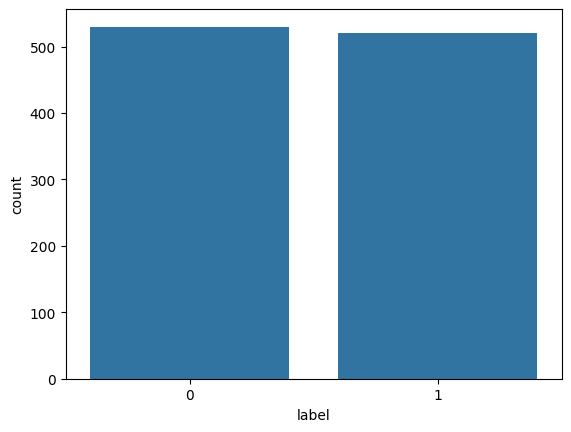

In [63]:
#menampilkan data label
y = df['label']
y[0:5]

#menampilkan grafik nilai dari variabel "label"
sns.countplot(x="label", data=df)

#menghitung jumlah data masing" label
df["label"].value_counts()

# Proses 2 (preprocessing, case folding, stopword removal, steming )

# Preprocessing

In [77]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# 1. Preprocessing Menggunakan Stemming Sastrawi dan Stopwordlist Indonesia

In [79]:
f=open('stopwordslist.txt')
ina_stopword = f.read()

tempStoplist = []
for tempstp in ina_stopword.split():
    tempStoplist.append(tempstp)

In [81]:
!pip install sastrawi

In [80]:
tempStoplist

['ada',
 'adanya',
 'adalah',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'diantaranya',
 'antara',
 'antaranya',
 'diantara',
 'apa',
 'apaan',
 'mengapa',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'atau',
 'ataukah',
 'ataupun',
 'bagai',
 'bagaikan',
 'sebagai',
 'sebagainya',
 'bagaimana',
 'bagaimanapun',
 'sebagaimana',
 'bagaimanakah',
 'bagi',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'sebaliknya',
 'banyak',
 'sebanyak',
 'beberapa',
 'seberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'sebegini',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'sebegitu',
 'belum',
 'belumlah',
 'sebelum',
 'sebelumnya',
 'sebenarnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'betulkah',
 'sebetulnya',
 'biasa',
 'biasanya',
 'bila',
 'bilakah',
 'bisa',
 'bisakah',
 'sebisanya',
 'boleh',
 'bolehkah',
 'bolehlah',
 'buat',
 'bukan',
 'bukankah',
 'bukanlah',


In [82]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [83]:
TEXT_CLEANING_RE = "@#=-_\S+|https?:\S+http?:\S|{^A-Za-z}+"

def preprosecessing(tweet):
    tweet = re.sub(TEXT_CLEANING_RE, ' ', str(tweet).lower()).strip()
    tokens = []
    for token in tweet.split():
        if token not in tempStoplist:
            tokens.append(token)
    return " ".join(tokens)

# Mengimplementasikan preprocessing Menggunakan Stemming Sastrawi dan Stopwordlist Indonesia

In [84]:
%%time

df['clean_twt'] = df.tweet.apply(lambda x: preprosecessing(x))
df['clean_twt'] = df.clean_twt.str.replace('rt', '')
df.head()

CPU times: user 195 ms, sys: 414 µs, total: 195 ms
Wall time: 355 ms


,label,tweet,clean_twt
0,1,rt @napqilla no ambisinya menguasai raky...,@napqilla no ambisinya menguasai rakyat no am...
1,1,rt @pandji nah gue pikir sentimen petahana ok...,@pandji gue pikir sentimen petahana oke #deba...
2,1,rt @pandji urutan pertama best moment #debat ...,@pandji urutan peama best moment #debat pilka...
3,1,rt @pandji ini artikel yg menjelaskan ternyat...,@pandji aikel yg menjelaskan ternyata #debat ...
4,0,rt @mrtampi agus makin santai nahok makin sa...,@mampi agus santai nahok santun nanies esmosi...


Nahh, disini dalam proses preprocessing memakan waktu yang lama, yaitu sekitar 5 menit.

# 2. Preprocessing Menggunakan Stemming English dan Stopwordlist English

In [85]:
nltk.download('stopwords')

stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [86]:
TEXT_CLEANING_RE = "@#=-_\S+|https?:\S+http?:\S|{^A-Za-z}+"

def preprosecessing(tweet):
    tweet = re.sub(TEXT_CLEANING_RE, ' ', str(tweet).lower()).strip()
    tokens = []
    for token in tweet.split():
        if token not in tempStoplist:
          token = stemmer.stem(token)
          tokens.append(token)
    return " ".join(tokens)

Mengimplementasikan preprocessing dengan Menggunakan Stemming English dan Stopwordlist English

In [87]:
%%time

df['clean_twt'] = df.tweet.apply(lambda x: preprosecessing(x))
df['clean_twt'] = df.clean_twt.str.replace('rt', '')
df.head()

CPU times: user 529 ms, sys: 0 ns, total: 529 ms
Wall time: 877 ms


,label,tweet,clean_twt
0,1,rt @napqilla no ambisinya menguasai raky...,@napqilla no ambisinya menguasai rakyat no am...
1,1,rt @pandji nah gue pikir sentimen petahana ok...,@pandji gue pikir sentimen petahana oke #deba...
2,1,rt @pandji urutan pertama best moment #debat ...,@pandji urutan peama best moment #debat pilka...
3,1,rt @pandji ini artikel yg menjelaskan ternyat...,@pandji aikel yg menjelaskan ternyata #debat ...
4,0,rt @mrtampi agus makin santai nahok makin sa...,@mampi agus santai nahok santun nani esmosi n...


Dan, disini dengan menggunakan stopwords bahasa Inggris waktu preprocessing

# Proses 3 (Modeling dengan Metode Logistic Regression)

# Logistic Regression

In [88]:
%%time

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, log_loss

vectorizer = TfidfVectorizer(ngram_range=(1, 3), min_df=10)
features = vectorizer.fit_transform(df.clean_twt)

X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=4)

LR_ = LogisticRegression(C=3, solver='liblinear', max_iter=150).fit(X_train, y_train)


CPU times: user 94 ms, sys: 0 ns, total: 94 ms
Wall time: 105 ms


In [89]:
features

<1050x634 sparse matrix of type '<class 'numpy.float64'>'
	with 14934 stored elements in Compressed Sparse Row format>

# Proses 4 (Evaluation)

# Evaluation

In [90]:
yhat = LR_.predict(X_test)
print('F1 score :', f1_score(y_test, yhat, average='weighted'))

yhat_prob = LR_.predict_proba(X_test)
print('Log loss :', log_loss(y_test, yhat_prob))

F1 score : 0.7435131195335277
Log loss : 0.5001674955429055


# Proses 5 (End Process : Prediction of Data Testing)

# Testing Prediksi

# Prediction

In [91]:
import pandas as pd
df_test = pd.read_csv('https://raw.githubusercontent.com/rasyidev/well-known-datasets/main/juli2test.csv')
df_test.head()

,tweet
0,soal quran polisi harus cari saksi yang den...
1,wajar rachmawati tersinggung megawati bawa ...
2,rt @l n chirpified mengapa anies b gaga...
3,rt @sibonekakayu kegaduhan yg diciptakan ah...
4,vivacoid ini video saat nusron wahid kritik...


In [92]:
df_test['clean_twt'] = df_test.tweet.apply(lambda x: preprosecessing(x))
df_test['clean_twt'] = df_test.clean_twt.str.replace('rt', '')
df_test.head()

,tweet,clean_twt
0,soal quran polisi harus cari saksi yang den...,soal quran polisi cari saksi dengar langsung p...
1,wajar rachmawati tersinggung megawati bawa ...,wajar rachmawati tersinggung megawati bawa aho...
2,rt @l n chirpified mengapa anies b gaga...,@l n chirpifi ani b gagal mendistribusikan ki...
3,rt @sibonekakayu kegaduhan yg diciptakan ah...,@sibonekakayu kegaduhan yg diciptakan ahok me...
4,vivacoid ini video saat nusron wahid kritik...,vivacoid video nusron wahid kritik mui soal ah...


In [96]:
def training_step(data, vectorizer) :
  features = vectorizer.fit_transform(df.clean_twt)
  LR_ = LogisticRegression(C=3, solver='liblinear', max_iter=150).fit(features, y)
  return LR_

classifier = training_step(df.clean_twt, vectorizer)
result = classifier.predict(vectorizer.transform(df_test.clean_twt))

In [97]:
np.savetxt('hasil_prediksi_juli.txt', result, fmt='%i', delimiter='\n')

In [98]:
df_hasil = pd.read_csv('hasil_prediksi_juli.txt')
df_hasil.head()

,1
0,1
1,0
2,1
3,0
4,1


In [100]:
def prediksi_komentar(comment) :
  result = classifier.predict(vectorizer.transform([comment]))
  if result == 1 :
   return "Positif"
  else:
    return "Negatif"

In [101]:
prediksi_komentar('Wah ahok cocok jadi presiden nih')

'Positif'